In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}
set_matplotlib_formats("svg")
plt.style.use('ggplot')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

from IPython.display import display, IFrame
def show_def():
    src = "https://docs.google.com/presentation/d/e/2PACX-1vRKMMwGtrQOeLefj31fCtmbNOaJuKY32eBz1VwHi_5ui0AGYV3MoCjPUtQ_4SB1f9x4Iu6gbH0vFvmB/embed?start=false&loop=false&delayms=60000"
    width = 960 
    height = 569
    display(IFrame(src, width, height))

# Lecture 9 – Functions and Apply

## DSC 10, Fall 2022

### Announcements

- Lab 3 is due on **Saturday 10/15 at 11:59PM**.
- Homework 3 is due on **Tuesday 10/18 at 11:59PM**.
- The Midterm Project will be released one week from today – start thinking about who you may want to partner up with!
    - You don't have to work with a partner.
    - If you do, your partner doesn't have to be from your lecture section.

### Agenda

- Functions.
- Applying functions to DataFrames.
- Example: Student names.

**Reminder:** Use the [DSC 10 Reference Sheet](https://drive.google.com/file/d/1mQApk9Ovdi-QVqMgnNcq5dZcWucUKoG-/view). You can also use it on exams!

## Functions

### Defining functions
* We've learned how to do quite a bit in Python:
    * Manipulate arrays, Series, and DataFrames.
    * Perform operations on strings.
    * Create visualizations.
* But so far, we've been restricted to using existing functions (e.g. `max`, `np.sqrt`, `len`) and methods (e.g. `.groupby`, `.assign`, `.plot`). 

### Motivation

Suppose you drive to a restaurant 🥘 in LA, located exactly 100 miles away.

- For the first 50 miles, you drive at 80 miles per hour.
- For the last 50 miles, you drive at 60 miles per hour.

- **Question:** What is your **average speed** throughout the journey?

- 🚨 The answer is not 70 miles per hour! Remember, from Homework 1, you need to use the fact that $\text{speed} = \frac{\text{distance}}{\text{time}}$.

$$\text{average speed} = \frac{\text{distance}}{\text{time}} = \frac{50 + 50}{\text{time}_1 + \text{time}_2} \text{ miles per hour}$$

In segment 1, when you drove 50 miles at 80 miles per hour, you drove for $\frac{50}{80}$ hours:

$$\text{speed}_1 = \frac{\text{distance}_1}{\text{time}_1}$$

$$80 \text{ miles per hour} = \frac{50 \text{ miles}}{\text{time}_1} \implies \text{time}_1 = \frac{50}{80} \text{ hours}$$

Similarly, in segment 2, when you drove 50 miles at 60 miles per hour, you drove for $\text{time}_2 = \frac{50}{60} \text{ hours}$.

Then,

$$\text{average speed} = \frac{50 + 50}{\frac{50}{80} + \frac{50}{60}}  \text{ miles per hour} $$

$$\begin{align*}\text{average speed} &= \frac{50}{50} \cdot \frac{1 + 1}{\frac{1}{80} + \frac{1}{60}} \text{ miles per hour} \\  &= \frac{2}{\frac{1}{80} + \frac{1}{60}} \text{ miles per hour} \end{align*}$$

### Example: Harmonic mean

The **harmonic mean** ($\text{HM}$) of two positive numbers, $a$ and $b$, is defined as

$$\text{HM} = \frac{2}{\frac{1}{a} + \frac{1}{b}}$$

It is often used to find the average of multiple **rates**.

Finding the harmonic mean of 80 and 60 is not hard:

In [2]:
2 / (1 / 80 + 1 / 60)

68.57142857142857

But what if we want to find the harmonic mean of 80 and 70? 80 and 90? 20 and 40? **This would require a lot of copy-pasting, which is prone to error.**

It turns out that we can **define** our own "harmonic mean" **function** just once, and re-use it multiple times.

In [3]:
def harmonic_mean(a, b):
    return 2 / (1 / a + 1 / b)

In [4]:
harmonic_mean(80, 60)

68.57142857142857

In [5]:
harmonic_mean(20, 40)

26.666666666666664

Note that we only had to specify how to calculate the harmonic mean once!

### Functions

Functions are a way to divide our code into small subparts to prevent us from writing repetitive code. Each time we **define** our own function in Python, we will use the following pattern.

In [6]:
show_def()

### Functions are "recipes"

- Functions take in inputs, known as **arguments**, do something, and produce some outputs.
- The beauty of functions is that **you don't need to know how they are implemented in order to use them!**
    - This is the premise of the idea of **abstraction** in computer science – you'll hear a lot about this in DSC 20.

In [7]:
harmonic_mean(20, 40)

26.666666666666664

In [8]:
harmonic_mean(79, 894)

145.17163412127442

In [9]:
harmonic_mean(-2, 4)

-8.0

### Parameters and arguments

`triple` has one **parameter**, `x`.

In [10]:
def triple(x):
    return x * 3

When we call `triple` with the **argument** 5, you can pretend that there's an invisible first line in the body of `triple` that says `x = 5`.

In [11]:
triple(5)

15

Note that arguments can be of any type!

In [12]:
triple('triton')

'tritontritontriton'

### Functions can take 0 or more arguments

Functions can have any number of arguments. So far, we've created a function that takes two arguments – `harmonic_mean` – and a function that takes one argument – `triple`.

`greeting` takes no arguments!

In [13]:
def greeting():
    return 'Hi! 👋'

In [14]:
greeting()

'Hi! 👋'

### Functions don't run until you call them!

The body of a function is not run until you use (**call**) the function.

Here, we can define `where_is_the_error` without seeing an error message. 

In [18]:
def where_is_the_error(something):
    '''You can describe your function within triple quotes. '''
    return (1 / 0) + something

It is only when we **call** `where_is_the_error` that Python gives us an error message.

In [22]:
help(where_is_the_error)

Help on function where_is_the_error in module __main__:

where_is_the_error(something)
    You can describe your function within triple quotes.



### Example: `first_name`

Let's create a function called `first_name` that takes in someone's full name and returns their first name. Example behavior is shown below.
```py
>>> first_name('Pradeep Khosla')
'Pradeep'
```
*Hint*: Use the string method `.split`.

General strategy for writing functions: 
1. First, try and get the behavior to work on a single example. 
2. Then, encapsulate that behavior inside a function.

In [23]:
'Pradeep Khosla'.split(' ')[0]

'Pradeep'

In [24]:
def first_name(full_name):
    '''Returns the first name given a full name.'''
    return full_name.split(' ')[0]

In [25]:
first_name('Pradeep Khosla')

'Pradeep'

In [26]:
# What if there are three names?
first_name('Chancellor Pradeep Khosla')

'Chancellor'

### Returning

- The `return` keyword specifies what the output of your function should be, i.e. what a call to your function will evaluate to.
- Most functions we write will use `return`, but using `return` is not required.
- Be careful: `print` and `return` work differently!

In [27]:
def pythagorean(a, b):
    '''Computes the hypotenuse length of a triangle with legs a and b.'''
    c = (a ** 2 + b ** 2) ** 0.5
    print(c)

In [28]:
x = pythagorean(3, 4)

5.0


In [29]:
# No output – why?
x

In [30]:
# Errors – why?
x + 10

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [31]:
def better_pythagorean(a, b):
    '''Computes the hypotenuse length of a triangle with legs a and b, and actually returns the result.'''
    c = (a ** 2 + b ** 2) ** 0.5
    return c

In [32]:
x = better_pythagorean(3, 4)
x

5.0

In [33]:
x + 10

15.0

### Returning
Once a function executes a `return` statement, it stops running.

In [34]:
def motivational(quote):
    return 0
    print("Here's a motivational quote:", quote)

In [35]:
motivational('Fall seven times and stand up eight.')

0

### Scope 🩺

The names you choose for a function’s parameters are only known to that function (known as **local scope**). The rest of your notebook is unaffected by parameter names.

In [42]:
def what_is_awesome(s):
    return s + ' is awesome!'

In [43]:
what_is_awesome('data science')

'data science is awesome!'

In [50]:
sd

NameError: name 'sd' is not defined

In [51]:
sd = 'DSC 10'

In [53]:
#what_is_awesome('data science')


x=2
def ex():
    return x
ex()

2

## Applying functions to DataFrames

### DSC 10 student data

The DataFrame `roster` contains the names and lecture sections of all students enrolled in DSC 10 this quarter. The first names are real, while the last names have been anonymized for privacy.

In [59]:
roster = bpd.read_csv('data/roster-anon.csv')
roster.get('name').

0       Levy Dmxsqj
1      Aiden Nyozzx
2      Sruti Fivolq
           ...     
408     Leni Hlfjhh
409     Dory Xaghsk
410    Laura Xfqwzu
Name: name, Length: 411, dtype: object

### Example: Common first names

What is the most common first name among DSC 10 students? (Any guesses?)

In [60]:
roster

,name,section
0,Levy Dmxsqj,11AM
1,Aiden Nyozzx,1PM
2,Sruti Fivolq,12PM
...,...,...
408,Leni Hlfjhh,11AM
409,Dory Xaghsk,1PM
410,Laura Xfqwzu,11AM


- **Problem**: We can't answer that right now, since we don't have a column with first names. If we did, we could group by it.



- **Solution**: Use our function that extracts first names on _every_ element of the `'name'` column.

### Using our `first_name` function

Somehow, we need to call `first_name` on every student's `'name'`.

In [61]:
roster

,name,section
0,Levy Dmxsqj,11AM
1,Aiden Nyozzx,1PM
2,Sruti Fivolq,12PM
...,...,...
408,Leni Hlfjhh,11AM
409,Dory Xaghsk,1PM
410,Laura Xfqwzu,11AM


In [62]:
roster.get('name').iloc[0]

'Levy Dmxsqj'

In [63]:
first_name(roster.get('name').iloc[0])

'Levy'

In [64]:
first_name(roster.get('name').iloc[1])

'Aiden'

Ideally, there's a better solution than doing this 411 times...

### `.apply`

- To **apply** a function to every element of column `column_name` in DataFrame `df`, use

<br>

<center><code>df.get(column_name).apply(function_name)</code></center>

- The `.apply` method is a **Series** method.
    - **Important:** We use `.apply` on Series, **not** DataFrames.
    - The output of `.apply` is also a Series.

- Pass _just the name_ of the function – don't call it!
    - Good ✅: `.apply(first_name)`.
    - Bad ❌: `.apply(first_name())`.

In [65]:
roster.get('name').apply(first_name)

0       Levy
1      Aiden
2      Sruti
       ...  
408     Leni
409     Dory
410    Laura
Name: name, Length: 411, dtype: object

In [66]:
%%pt

roster.get('name').apply(first_name)

### Example: Common first names

In [67]:
with_first = roster.assign(
    first=roster.get('name').apply(first_name)
)
with_first

,name,section,first
0,Levy Dmxsqj,11AM,Levy
1,Aiden Nyozzx,1PM,Aiden
2,Sruti Fivolq,12PM,Sruti
...,...,...,...
408,Leni Hlfjhh,11AM,Leni
409,Dory Xaghsk,1PM,Dory
410,Laura Xfqwzu,11AM,Laura


In [68]:
first_counts = with_first.groupby('first').count().sort_values('name', ascending=False).get(['name'])
first_counts

,name
first,
Ethan,5
Steven,4
Jason,4
...,...
Huanchang,1
Housheng,1
Zoya,1


### Activity

Below:
- Create a **bar chart** showing the number of students with each first name, but only include first names shared by at least two students.
- Determine the **proportion** of students in DSC 10 who have a first name that is shared by at least two students.

0.20194647201946472

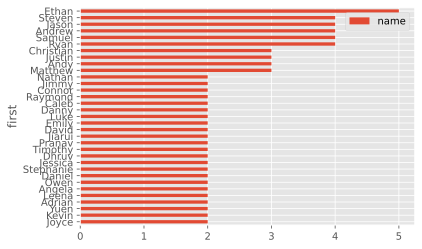

In [70]:
first_counts[first_counts.get('name') > 1].sort_values(by = 'name').plot(kind = 'barh')
first_counts[first_counts.get('name') > 1].get('name').sum() / first_counts.get('name').sum()

### Note: `.apply` works with built-in functions, too!

For instance, to find the length of each name, we might use the `len` function:

In [71]:
with_first

,name,section,first
0,Levy Dmxsqj,11AM,Levy
1,Aiden Nyozzx,1PM,Aiden
2,Sruti Fivolq,12PM,Sruti
...,...,...,...
408,Leni Hlfjhh,11AM,Leni
409,Dory Xaghsk,1PM,Dory
410,Laura Xfqwzu,11AM,Laura


In [72]:
with_first.get('first').apply(len)

0      4
1      5
2      5
      ..
408    4
409    4
410    5
Name: first, Length: 411, dtype: int64

### Aside: what if names are in the index?

We were able to apply `first_name` to the `'name'` column because it's a Series. The `.apply` method doesn't work on the index, because the index is not a Series.

In [73]:
indexed_by_name = roster.set_index('name')
indexed_by_name

,section
name,
Levy Dmxsqj,11AM
Aiden Nyozzx,1PM
Sruti Fivolq,12PM
...,...
Leni Hlfjhh,11AM
Dory Xaghsk,1PM
Laura Xfqwzu,11AM


In [74]:
indexed_by_name.index.apply(first_name)

AttributeError: 'Index' object has no attribute 'apply'

### Solution: `.reset_index()`

Use `.reset_index()` to turn the index of a DataFrame into a column, and to reset the index back to the default of 0, 1, 2, 3, and so on.

In [ ]:
indexed_by_name.reset_index()

In [ ]:
indexed_by_name.reset_index().get('name').apply(first_name)

### Example: Shared first names and sections

- Suppose you're one of the $\approx$20\% of students in DSC 10 who has a first name that is shared with at least one other student.
- Let's try and determine whether someone **in your lecture section** shares the same first name as you.

In [ ]:
with_first

For example, maybe `'Ryan Ufhwdl'` wants to see if there's another `'Ryan'` in their section. 

Strategy:
1. What section is `'Ryan Ufhwdl'` in?
2. How many people are in that section and named `'Ryan'`?

In [76]:
what_section = with_first[with_first.get('name') == 'Ryan Ufhwdl'].get('section').iloc[0]
what_section

'1PM'

In [81]:
how_many = with_first[(with_first.get('section') == what_section) & (with_first.get('first') == 'Ryan')].shape[0]
how_many

2

### Another function: `shared_first_and_section`

Let's create a function named `shared_first_and_section`. It will take in the **full name** of a student and return **the number** of students in their section with the same first name and section (including them).

*Note*: This is the first function we're writing that involves using a DataFrame within the function – this is fine!

In [82]:
def shared_first_and_section(name):
    # First, find the row corresponding to that full name in with_first.
    # We're assuming that full names are unique.
    row = with_first[with_first.get('name') == name]
    
    # Then, get that student's first name and section.
    first = row.get('first').iloc[0]
    section = row.get('section').iloc[0]
    
    # Now, find all the students with the same first name and section.
    shared_info = with_first[(with_first.get('first') == first) & (with_first.get('section') == section)]
    
    # Return the number of such students.
    return shared_info.shape[0]

In [83]:
shared_first_and_section('Ryan Ufhwdl')

2

In [84]:
shared_first_and_section('Dory Xaghsk')

1

Now, let's add a column to `with_first` that contains the values returned by `shared_first_and_section`.

In [85]:
with_first = with_first.assign(shared=with_first.get('name').apply(shared_first_and_section))
with_first

,name,section,first,shared
0,Levy Dmxsqj,11AM,Levy,1
1,Aiden Nyozzx,1PM,Aiden,1
2,Sruti Fivolq,12PM,Sruti,1
...,...,...,...,...
408,Leni Hlfjhh,11AM,Leni,1
409,Dory Xaghsk,1PM,Dory,1
410,Laura Xfqwzu,11AM,Laura,1


Let's look at all the students who are in a section with someone that has the same first name as them.

In [86]:
with_first[(with_first.get('shared') > 1)].sort_values('shared', ascending=False)

,name,section,first,shared
39,Ethan Dpcred,1PM,Ethan,3
352,Andrew Aspfmf,10AM,Andrew,3
80,Samuel Vwwdmu,1PM,Samuel,3
...,...,...,...,...
82,Ryan Ufhwdl,1PM,Ryan,2
40,Justin Plbevg,11AM,Justin,2
375,Kevin Sgywid,10AM,Kevin,2


We can narrow this down to a particular lecture section if we'd like.

In [87]:
one_section_only = with_first[(with_first.get('shared') > 1) & 
                              (with_first.get('section') == '10AM')].sort_values('shared', ascending=False)
one_section_only

,name,section,first,shared
88,Andrew Qgvdmn,10AM,Andrew,3
117,Andrew Klhlht,10AM,Andrew,3
352,Andrew Aspfmf,10AM,Andrew,3
28,Kevin Wphdws,10AM,Kevin,2
375,Kevin Sgywid,10AM,Kevin,2


In [ ]:
one_section_only.get('first').unique()

### Sneak peek

While the DataFrames on the previous slide contain the info we were looking for, they're not organized very conveniently. For instance, there are three rows containing the fact that there are 3 `'Andrew'`s in the 10AM lecture section. 

Wouldn't it be great if we could create a DataFrame like the one below? We'll see how on Friday!

|    | section   | first   |   count |
|---:|:----------|:--------|--------:|
|  0 | 10AM      | Andrew  |       3 |
|  1 | 1PM       | Ethan   |       3 |
|  2 | 1PM       | Samuel  |       3 |
|  3 | 10AM      | Kevin   |       2 |
|  4 | 11AM      | Connor  |       2 |

### Activity

Find the longest first name in the class that is shared by at least two students in the same section.

*Hint*: You'll have to use both `assign` and `apply`.

In [103]:
lens = with_first[with_first.get('shared') > 1]
with_length = with_length.assign(length = lens.get('first').apply(len))
with_length.sort_values('length', ascending=False)

,name,section,first,shared,length
283,Jessica Tfehfu,11AM,Jessica,2,7
336,Matthew Tsupae,12PM,Matthew,2,7
222,Matthew Qlbjke,12PM,Matthew,2,7
...,...,...,...,...,...
82,Ryan Ufhwdl,1PM,Ryan,2,4
344,Owen Fhupkt,11AM,Owen,2,4
239,Owen Eubwym,11AM,Owen,2,4


## Summary, next time

### Summary

- Functions are a way to divide our code into small subparts to prevent us from writing repetitive code.
- The `.apply` method allows us to call a function on every single element of a Series, which usually comes from `.get`ting a column of a DataFrame.

### Next time

More advanced DataFrame manipulations!